# Compulsory Assignment 1 - IND320
**Name of student:** Kristian Strøm  
**Github repo:** https://github.com/KriStrom/kstrom-ind320-dashboard  
**Streamlit address:** https://kstrom-ind320.streamlit.app/

### Declaration of AI usage

In this assignment I have used the AI agent Chat GPT for quicker writing of code for plotting in this notebook and debugging. I have deactivated copilot-autofill because of personal annoyance.

### Compulsary log

I found the assignment and technical coding of streamlit more challenging than expected, but still manageable. I think the task descriptions were a bit vague, but have done it in a way I think fulfills the task.  
  
I began doing the notebook and trying to explore the dataset, before setting up the directory and splitting the project into parts - to make it somewhat object oriented. For later I think the data loader in the utils folder need to be specified to the specific dataset load, instead of a generic one. That way I can simplify the transformation code and have proper data inheritance to make it easier to maintain.

The data exploration was ok, I have done it a lot in DAT200 and it's still fresh. However, how plotting all columns together with logcial scaling was challenging, and I think I can improve my 'solution' there.

## Coding

### Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

### Data import

In [10]:
df = pd.read_csv("../data/open-meteo-subset.csv")
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


In [29]:
# Converting time to datetime format
df["time"] = pd.to_datetime(df["time"])
df.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


### Data visualization

#### Descriptive statistics

In [11]:
# Descriptive statistics
df.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,-0.394909,0.222854,3.661689,8.300719,212.209589
std,6.711903,0.493747,2.253210,5.098909,91.371980
min,-19.300000,0.000000,0.100000,0.200000,0.000000
25%,-4.900000,0.000000,1.800000,4.500000,128.000000
50%,-1.000000,0.000000,3.300000,7.700000,238.000000
75%,4.100000,0.200000,5.100000,11.500000,292.000000
max,19.900000,5.800000,13.600000,28.700000,360.000000


#### Separate column plotting

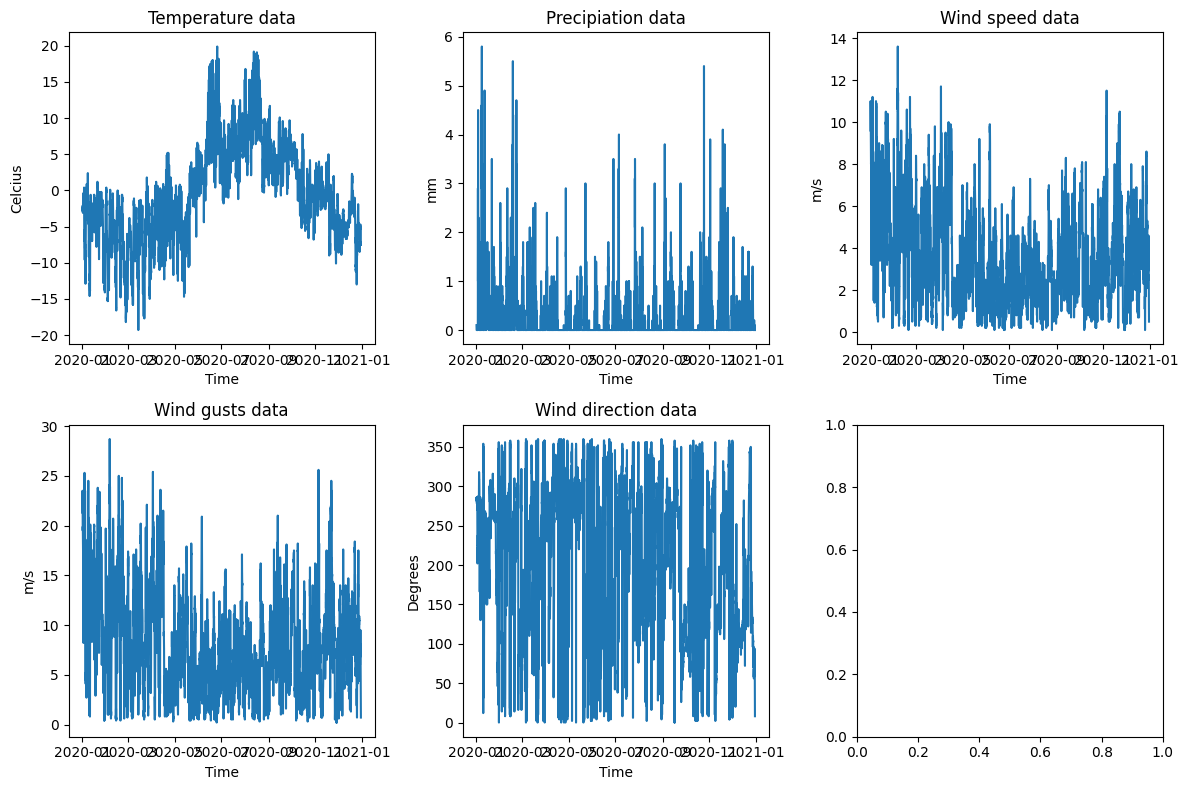

In [34]:
# Plotting each column separately
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Temperature columnn
axs[0, 0].plot(df["time"], df["temperature_2m (°C)"])
axs[0, 0].set_xlabel("Time")
axs[0, 0].set_ylabel("Celcius")
axs[0, 0].set_title("Temperature data")


# Precipiation columnn
axs[0, 1].plot(df["time"], df["precipitation (mm)"])
axs[0, 1].set_xlabel("Time")
axs[0, 1].set_ylabel("mm")
axs[0, 1].set_title("Precipiation data")

# Wind speed columnn
axs[0, 2].plot(df["time"], df["wind_speed_10m (m/s)"])
axs[0, 2].set_xlabel("Time")
axs[0, 2].set_ylabel("m/s")
axs[0, 2].set_title("Wind speed data")

# Wind gust columnn
axs[1, 0].plot(df["time"], df["wind_gusts_10m (m/s)"])
axs[1, 0].set_xlabel("Time")
axs[1, 0].set_ylabel("m/s")
axs[1, 0].set_title("Wind gusts data")

# Wind direction columnn
axs[1, 1].plot(df["time"], df["wind_direction_10m (°)"])
axs[1, 1].set_xlabel("Time")
axs[1, 1].set_ylabel("Degrees")
axs[1, 1].set_title("Wind direction data")

fig.tight_layout()


#### Combining the columns plotting

In [58]:
# Scaling the data with min-max normalization
df_temp = df.drop("time", axis=1)
df_scaled = ((df_temp-df_temp.min())*100 / (df_temp.max()-df_temp.min()))
df_scaled = pd.concat((df_scaled, df["time"]), axis=1)
df_scaled.describe()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°),time
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760
mean,48.227274,3.842308,26.382885,28.423576,58.947108,2020-07-01 11:30:00
min,0.000000,0.000000,0.000000,0.000000,0.000000,2020-01-01 00:00:00
25%,36.734694,0.000000,12.592593,15.087719,35.555556,2020-04-01 05:45:00
50%,46.683673,0.000000,23.703704,26.315789,66.111111,2020-07-01 11:30:00
75%,59.693878,3.448276,37.037037,39.649123,81.111111,2020-09-30 17:15:00
max,100.000000,100.000000,100.000000,100.000000,100.000000,2020-12-30 23:00:00
std,17.122202,8.512884,16.690443,17.890908,25.381106,NaN


In [59]:
df_scaled.head()

,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°),time
0,43.622449,1.724138,70.370370,74.035088,78.888889,2020-01-01 00:00:00
1,43.622449,0.000000,77.777778,80.000000,78.333333,2020-01-01 01:00:00
2,43.367347,0.000000,80.740741,81.754386,78.888889,2020-01-01 02:00:00
3,43.367347,0.000000,77.777778,81.052632,78.888889,2020-01-01 03:00:00
4,42.346939,0.000000,77.777778,79.298246,78.888889,2020-01-01 04:00:00


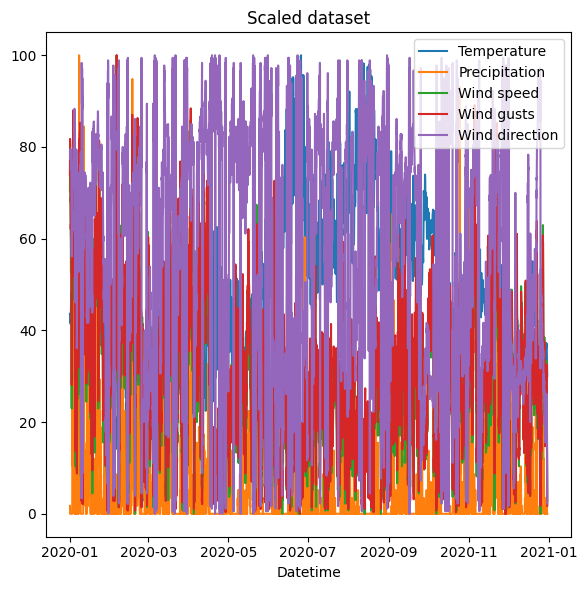

In [71]:
# Plotting the columns together
plt.figure(figsize=(6, 6))
plt.plot(df_scaled["time"], df_scaled["temperature_2m (°C)"], label="Temperature")
plt.plot(df_scaled["time"], df_scaled["precipitation (mm)"], label="Precipitation")
plt.plot(df_scaled["time"], df_scaled["wind_speed_10m (m/s)"], label="Wind speed")
plt.plot(df_scaled["time"], df_scaled["wind_gusts_10m (m/s)"], label="Wind gusts")
plt.plot(df_scaled["time"], df_scaled["wind_direction_10m (°)"], label="Wind direction")
plt.xlabel("Datetime")
plt.title("Scaled dataset")
plt.legend()
plt.tight_layout()
plt.show()

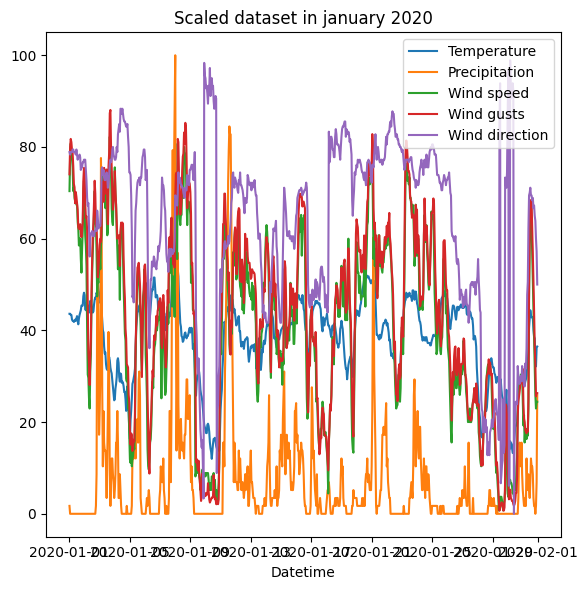

In [76]:
# Using only the 1st month to avoid mess
df_first_month = df_scaled[df_scaled["time"].dt.month == 1]

# Plotting the columns together
plt.figure(figsize=(6, 6))

plt.plot(df_first_month["time"], df_first_month["temperature_2m (°C)"], label="Temperature")
plt.plot(df_first_month["time"], df_first_month["precipitation (mm)"], label="Precipitation")
plt.plot(df_first_month["time"], df_first_month["wind_speed_10m (m/s)"], label="Wind speed")
plt.plot(df_first_month["time"], df_first_month["wind_gusts_10m (m/s)"], label="Wind gusts")
plt.plot(df_first_month["time"], df_first_month["wind_direction_10m (°)"], label="Wind direction")
plt.xlabel("Datetime")
plt.title("Scaled dataset in january 2020")
plt.legend()
plt.tight_layout()
plt.show()